In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Load Boston House Pricing Dataset

In [2]:
df = pd.read_csv('boston.csv')

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
df.shape

(506, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
df.drop("B", axis=1, inplace=True)

### Check missing values

In [7]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

### Summarizing stats of the data

In [8]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


###Exploratory Data Analysis

#### Correlation

In [9]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536


d:\VS_Code\Codes_Python\ML\End_2_End_Project\Boston_House_Pricing\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\VS_Code\Codes_Python\ML\End_2_End_Project\Boston_House_Pricing\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\VS_Code\Codes_Python\ML\End_2_End_Project\Boston_House_Pricing\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\VS_Code\Codes_Python\ML\End_2_End_Project\Boston_House_Pricin

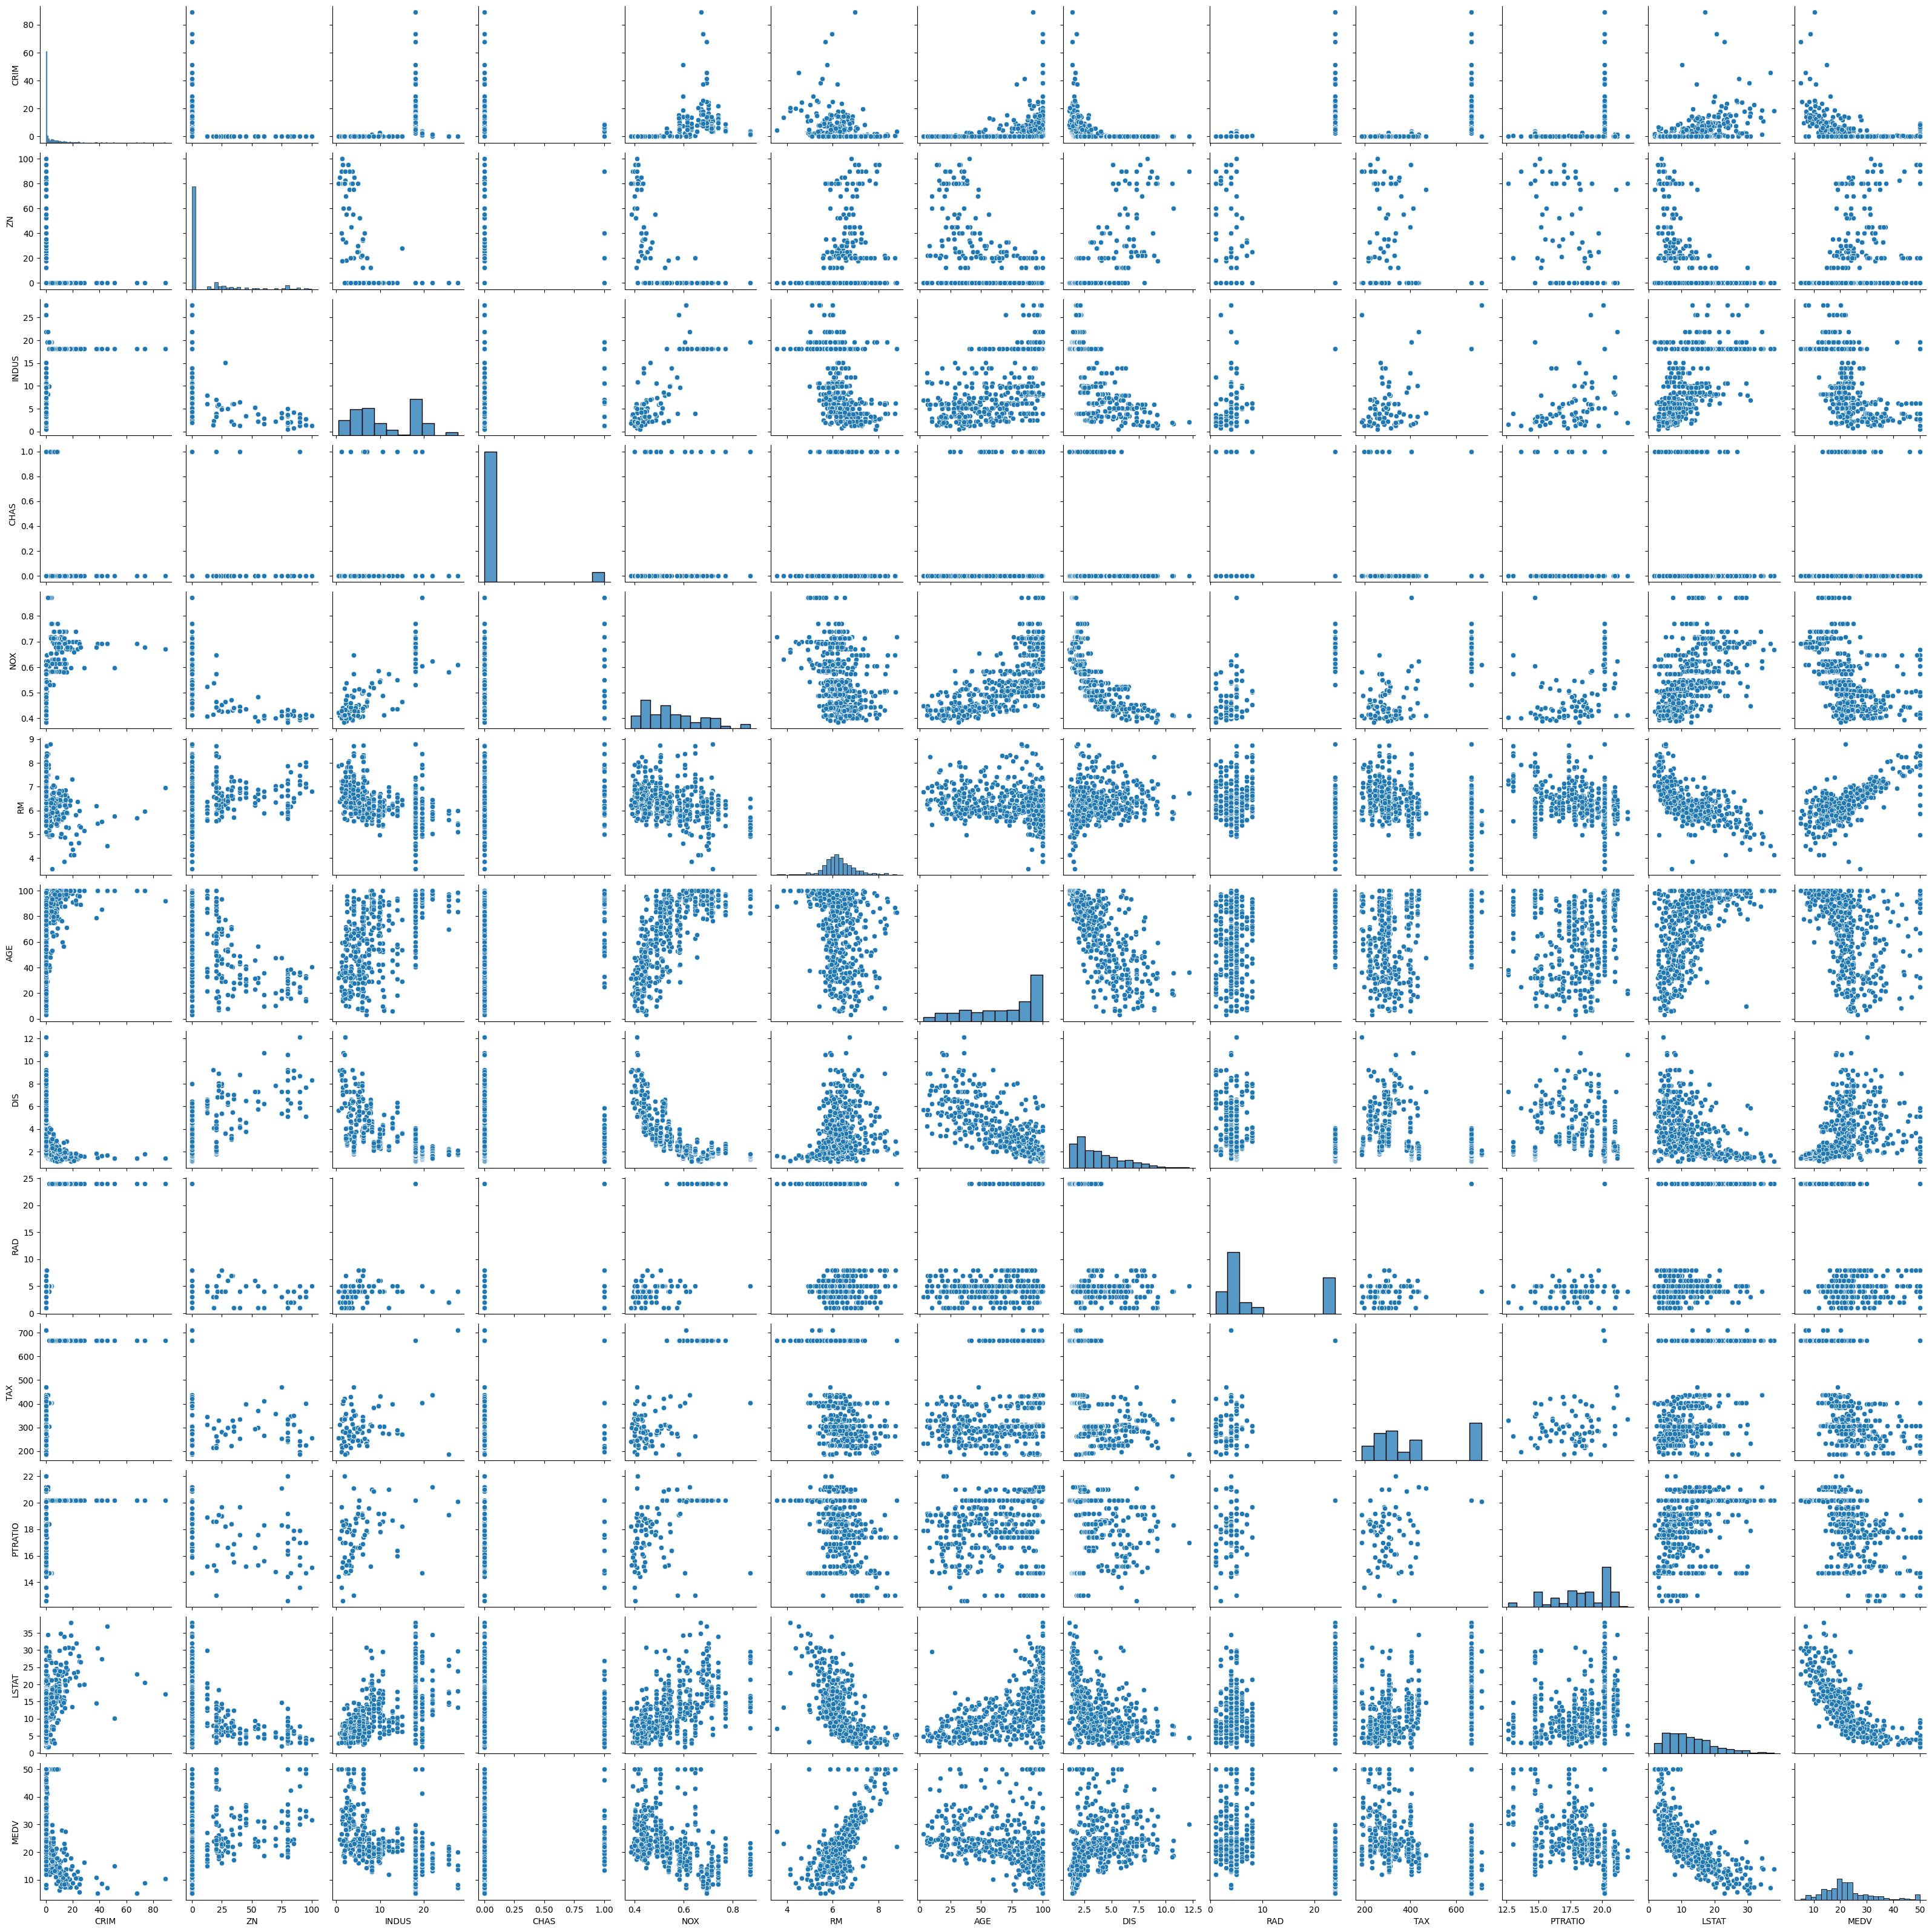

In [10]:
import seaborn as sns
sns.pairplot(df)

Text(0, 0.5, 'Median House Value')

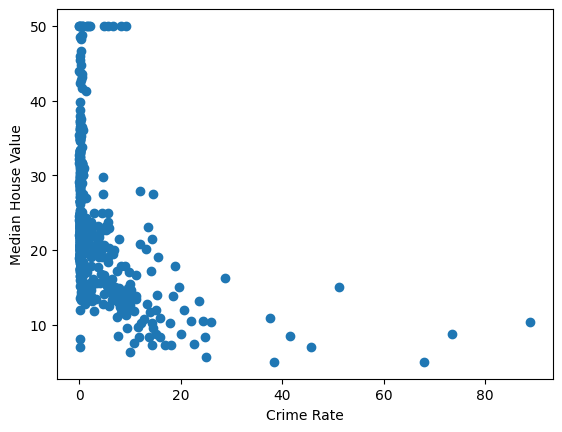

In [11]:
plt.scatter(df['CRIM'], df['MEDV'])
plt.xlabel("Crime Rate")
plt.ylabel("Median House Value")

Text(0, 0.5, 'Median House Value')

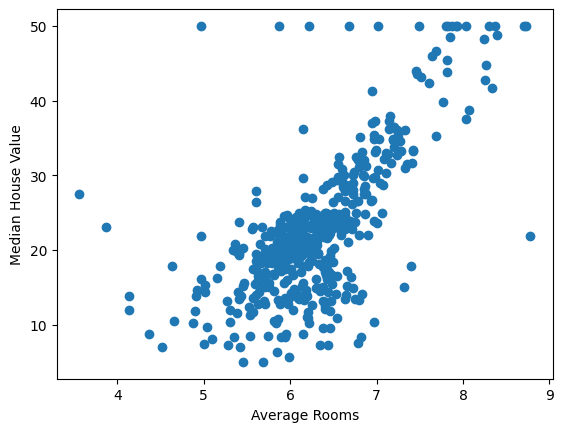

In [12]:
plt.scatter(df['RM'], df['MEDV'])
plt.xlabel("Average Rooms")
plt.ylabel("Median House Value")

<Axes: xlabel='RM', ylabel='MEDV'>

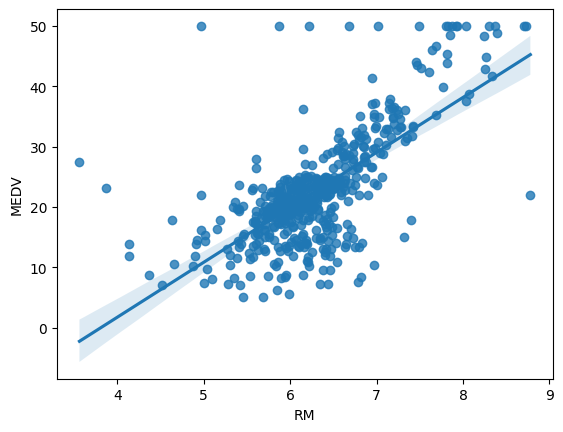

In [13]:
sns.regplot(x="RM", y="MEDV", data=df)

<Axes: xlabel='LSTAT', ylabel='MEDV'>

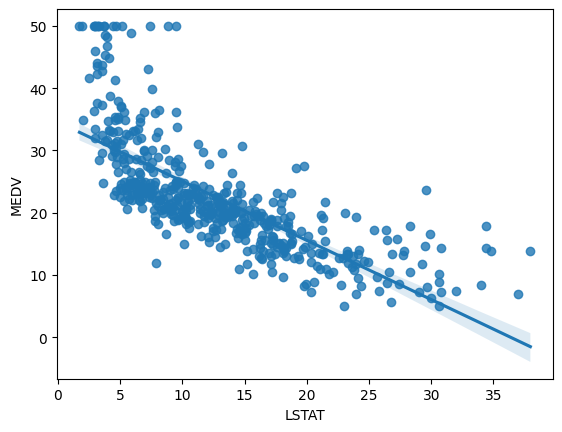

In [14]:
sns.regplot(x="LSTAT", y="MEDV", data=df)

<Axes: xlabel='PTRATIO', ylabel='LSTAT'>

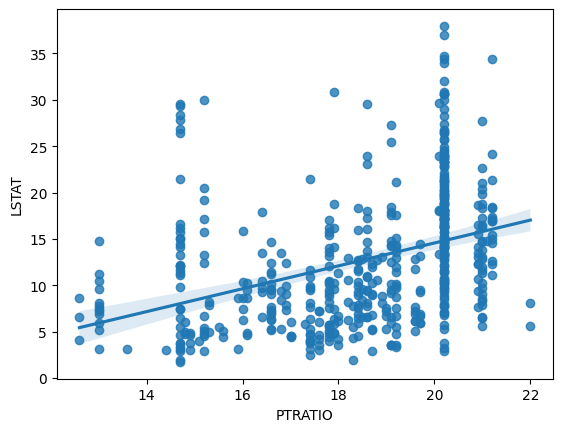

In [15]:
sns.regplot(x="PTRATIO", y="LSTAT", data=df)

### Independent and Dependent features

In [16]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [17]:
print(x.shape)
print(y.shape)

(506, 12)
(506,)


In [18]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,5.33


In [19]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

### Train Test Split

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=17)

In [21]:
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
410,51.13580,0.0,18.10,0,0.597,5.757,100.0,1.4130,24,666.0,20.2,10.11
76,0.10153,0.0,12.83,0,0.437,6.279,74.5,4.0522,5,398.0,18.7,11.97
150,1.65660,0.0,19.58,0,0.871,6.122,97.3,1.6180,5,403.0,14.7,14.10
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,5.33
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666.0,20.2,18.13
...,...,...,...,...,...,...,...,...,...,...,...,...
406,20.71620,0.0,18.10,0,0.659,4.138,100.0,1.1781,24,666.0,20.2,23.34
390,6.96215,0.0,18.10,0,0.700,5.713,97.0,1.9265,24,666.0,20.2,17.11
143,4.09740,0.0,19.58,0,0.871,5.468,100.0,1.4118,5,403.0,14.7,26.42
241,0.10612,30.0,4.93,0,0.428,6.095,65.1,6.3361,6,300.0,16.6,12.40


In [22]:
x_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
191,0.06911,45.0,3.44,0,0.437,6.739,30.8,6.4798,5,398.0,15.2,4.69
285,0.01096,55.0,2.25,0,0.389,6.453,31.9,7.3073,1,300.0,15.3,8.23
461,3.69311,0.0,18.10,0,0.713,6.376,88.4,2.5671,24,666.0,20.2,14.65
225,0.52693,0.0,6.20,0,0.504,8.725,83.0,2.8944,8,307.0,17.4,4.63
159,1.42502,0.0,19.58,0,0.871,6.510,100.0,1.7659,5,403.0,14.7,7.39
...,...,...,...,...,...,...,...,...,...,...,...,...
498,0.23912,0.0,9.69,0,0.585,6.019,65.3,2.4091,6,391.0,19.2,12.92
189,0.08370,45.0,3.44,0,0.437,7.185,38.9,4.5667,5,398.0,15.2,5.39
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,2.94
356,8.98296,0.0,18.10,1,0.770,6.212,97.4,2.1222,24,666.0,20.2,17.60


### Standardize the dataset

In [23]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [24]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [25]:
import pickle
pickle.dump(scaler, open('scaling.pkl', 'wb'))

In [26]:
x_train

array([[ 5.34825922, -0.45850446,  0.9625164 , ...,  1.47035568,
         0.79887187, -0.38754387],
       [-0.42500818, -0.45850446,  0.19347119, ..., -0.10650704,
         0.11346072, -0.1330972 ],
       [-0.24909041, -0.45850446,  1.17849114, ..., -0.07708796,
        -1.71430236,  0.15828527],
       ...,
       [ 0.02702584, -0.45850446,  1.17849114, ..., -0.07708796,
        -1.71430236,  1.84365244],
       [-0.42448893,  0.84992423, -0.95936697, ..., -0.68312103,
        -0.8461149 , -0.07427351],
       [-0.42508624, -0.45850446, -0.21804825, ...,  0.0935427 ,
        -0.29778598, -0.3807039 ]])

In [27]:
x_test

array([[-0.4286757 ,  1.50413857, -1.17680101, ..., -0.10650704,
        -1.48583198, -1.12899598],
       [-0.43525394,  1.94028147, -1.35045637, ..., -0.68312103,
        -1.4401379 , -0.64472652],
       [-0.01870959, -0.45850446,  0.9625164 , ...,  1.47035568,
         0.79887187,  0.23352488],
       ...,
       [-0.43283192, -0.45850446, -1.3606714 , ..., -1.14205868,
         0.11346072, -1.36839473],
       [ 0.57970631, -0.45850446,  0.9625164 , ...,  1.47035568,
         0.79887187,  0.63708276],
       [-0.43062485, -0.45850446, -1.02357568, ..., -0.99496328,
         0.02207256, -0.01134584]])

### Model Training

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
regression=LinearRegression()

In [30]:
regression.fit(x_train, y_train)

LinearRegression()

### Print Coefficients and Intercept

In [31]:
print(regression.coef_)

[-1.06042362  1.27763502  0.4509693   0.92493118 -2.04265553  2.32111395
  0.07092531 -3.05898638  2.56121864 -2.27949355 -2.01194583 -4.37626508]


In [32]:
print(regression.intercept_)

22.38785310734463


### Parameters of training model

In [33]:
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

### Prediction with Test Data

In [34]:
y_pred=regression.predict(x_test)

In [35]:
y_pred

array([30.24412846, 27.38862434, 19.39985984, 38.62329443, 25.98209891,
       17.97389504, 36.8486964 , 22.01244851,  3.23594533, 30.86746509,
       17.43387757, 19.99371204, 22.58888841, 18.9476756 , 22.274735  ,
       23.2749933 , 24.17141069, 16.45705761, 15.47551271, 19.43894494,
       32.46846243, 28.65798679, 16.12370307, 19.38523244, 24.70750976,
       33.77811304, 17.35819224,  8.92059918, 17.17041189, 25.94599255,
       25.20797921, 20.14590936, 22.27371422, 22.00254932, 20.91378161,
        7.96069084, 34.62040065, 12.11168963, 20.44689698, 34.85072945,
       10.73390776, 20.78791898, 27.53337801, 20.56633643, 20.16430544,
       15.72568082, 31.51459687, 28.67294356, 20.57905628, 17.25295083,
       27.72713223, 23.6162891 , 28.6494651 , 22.52461491, 19.53082863,
       14.65393479, 17.57450366, 25.30427026, 36.40710826, 26.98934062,
       23.70270202, 21.65496129, 23.77950824, 20.43134511, 14.72212808,
       25.35754689, 28.59429342, 32.52647496, 32.04364179, 27.44

### Assumptions

### Scatterplot for prediction

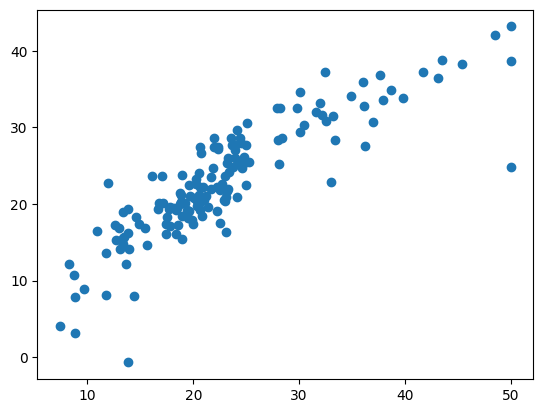

In [36]:
plt.scatter(y_test, y_pred)

### Residuals

In [37]:
residuals=y_test-y_pred

In [38]:
residuals

191     0.255872
285    -5.388624
461    -1.699860
225    11.376706
159    -2.682099
         ...    
498     0.220387
189     0.795743
3       5.016222
356    -1.865450
86      0.690688
Name: MEDV, Length: 152, dtype: float64

### Plot residuals

d:\VS_Code\Codes_Python\ML\End_2_End_Project\Boston_House_Pricing\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


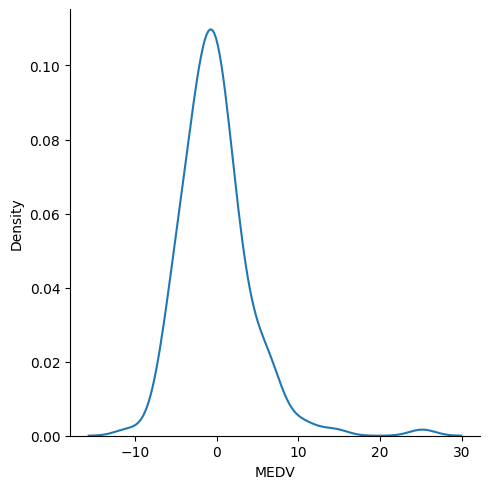

In [39]:
sns.displot(residuals,kind="kde")

### Scatterplot for prediction and residuals

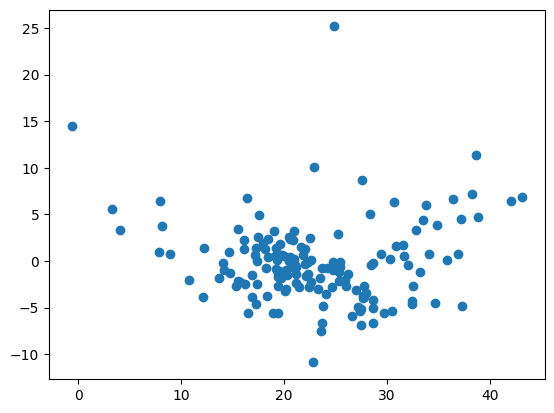

In [40]:
plt.scatter(y_pred, residuals)

### Performance metrics

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))

3.0557466703856275
18.75801486407392
4.331052396828503


In [42]:
score=r2_score(y_test, y_pred)
print(score)

0.7526430667526225


In [43]:
adjusted_r2 = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print(adjusted_r2)

0.7312885113643597


###New Data Prediction

In [44]:
x_test[0]

array([-0.4286757 ,  1.50413857, -1.17680101, -0.28154625, -1.06392331,
        0.64649711, -1.37472998,  1.33142736, -0.54872817, -0.10650704,
       -1.48583198, -1.12899598])

In [45]:
new_data=x_test[0].reshape(1, -1)

In [46]:
regression.predict(new_data)

array([30.24412846])

In [47]:
y_pred[0]

30.24412845769506

###Pickling the model file for deployment

In [48]:
import pickle

In [49]:
pickle.dump(regression, open('regmodel.pkl','wb'))

In [50]:
pickled_model=pickle.load(open('regmodel.pkl', 'rb'))

In [51]:
pickled_model.predict(new_data)

array([30.24412846])